<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Explore-The-Dataset" data-toc-modified-id="Challenge-1---Explore-The-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Explore The Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-data-from-an-bird's-eye-view." data-toc-modified-id="Explore-the-data-from-an-bird's-eye-view.-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the data from an bird's-eye view.</a></span></li><li><span><a href="#Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated." data-toc-modified-id="Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated.-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>Next, evaluate if the columns in this dataset are strongly correlated.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Remove-Column-Collinearity." data-toc-modified-id="Challenge-2---Remove-Column-Collinearity.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Remove Column Collinearity.</a></span></li><li><span><a href="#Challenge-3---Handle-Missing-Values" data-toc-modified-id="Challenge-3---Handle-Missing-Values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Handle Missing Values</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions." data-toc-modified-id="In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.</a></span></li><li><span><a href="#Again,-examine-the-number-of-missing-values-in-each-column." data-toc-modified-id="Again,-examine-the-number-of-missing-values-in-each-column.-4.0.0.2"><span class="toc-item-num">4.0.0.2&nbsp;&nbsp;</span>Again, examine the number of missing values in each column.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Handle-WHOIS_*-Categorical-Data" data-toc-modified-id="Challenge-4---Handle-WHOIS_*-Categorical-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Handle <code>WHOIS_*</code> Categorical Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-fix-the-country-values-as-intructed-above." data-toc-modified-id="In-the-cells-below,-fix-the-country-values-as-intructed-above.-5.0.0.1"><span class="toc-item-num">5.0.0.1&nbsp;&nbsp;</span>In the cells below, fix the country values as intructed above.</a></span></li><li><span><a href="#If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values." data-toc-modified-id="If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values.-5.0.0.2"><span class="toc-item-num">5.0.0.2&nbsp;&nbsp;</span>If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.</a></span></li><li><span><a href="#After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER." data-toc-modified-id="After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER.-5.0.0.3"><span class="toc-item-num">5.0.0.3&nbsp;&nbsp;</span>After verifying, now let's keep the top 10 values of the column and re-label other columns with <code>OTHER</code>.</a></span></li><li><span><a href="#In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE']." data-toc-modified-id="In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE'].-5.0.0.4"><span class="toc-item-num">5.0.0.4&nbsp;&nbsp;</span>In the next cell, drop <code>['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']</code>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal" data-toc-modified-id="Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Handle Remaining Categorical Data &amp; Convert to Ordinal</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate." data-toc-modified-id="URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate.-6.0.0.1"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span><code>URL</code> is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.</a></span></li><li><span><a href="#Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is." data-toc-modified-id="Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is.-6.0.0.2"><span class="toc-item-num">6.0.0.2&nbsp;&nbsp;</span>Print the unique value counts of <code>CHARSET</code>. You see there are only a few unique values. So we can keep it as it is.</a></span></li><li><span><a href="#Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next." data-toc-modified-id="Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next.-6.0.0.3"><span class="toc-item-num">6.0.0.3&nbsp;&nbsp;</span>Before you think of your own solution, don't read the instructions that come next.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-6---Modeling,-Prediction,-and-Evaluation" data-toc-modified-id="Challenge-6---Modeling,-Prediction,-and-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Modeling, Prediction, and Evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-this-lab,-we-will-try-two-different-models-and-compare-our-results." data-toc-modified-id="In-this-lab,-we-will-try-two-different-models-and-compare-our-results.-7.0.0.1"><span class="toc-item-num">7.0.0.1&nbsp;&nbsp;</span>In this lab, we will try two different models and compare our results.</a></span></li><li><span><a href="#Our-second-algorithm-is-is-DecisionTreeClassifier" data-toc-modified-id="Our-second-algorithm-is-is-DecisionTreeClassifier-7.0.0.2"><span class="toc-item-num">7.0.0.2&nbsp;&nbsp;</span>Our second algorithm is is DecisionTreeClassifier</a></span></li><li><span><a href="#We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5." data-toc-modified-id="We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5.-7.0.0.3"><span class="toc-item-num">7.0.0.3&nbsp;&nbsp;</span>We'll create another DecisionTreeClassifier model with max_depth=5.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Bonus-Challenge---Feature-Scaling" data-toc-modified-id="Bonus-Challenge---Feature-Scaling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge - Feature Scaling</a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

Your features will be:

+ URL: it is the anonymous identification of the URL analyzed in the study
+ URL_LENGTH: it is the number of characters in the URL
+ NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”
+ CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).
+ SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
+ CONTENT_LENGTH: it represents the content size of the HTTP header.
+ WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM
+ WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed
+ TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client
+ DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP
+ REMOTE_IPS: this variable has the total number of IPs connected to the honeypot
+ APP_BYTES: this is the number of bytes transfered
+ SOURCE_APP_PACKETS: packets sent from the honeypot to the server
+ REMOTE_APP_PACKETS: packets received from the server
+ APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server
+ DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server
+ TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:


*Source: [kaggle](https://www.kaggle.com/viratkothari/malicious-and-benign-websites-classification)*

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# What the dataset looks like?
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
# What are the data types?
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [5]:
# Which columns contain the features of the websites?

#since the 'URL' is an identifyier, i think we can leave it out
feats = websites.iloc[:,:-1]


In [6]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
# 0 for bening 1 for maliciuos websites
labels = websites["Type"]

In [7]:
# 0 for bening 1 for maliciuos websites

In [8]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

# chage some types to date format
feats['WHOIS_REGDATE'] = pd.to_datetime(feats['WHOIS_REGDATE'], errors='coerce')
feats['WHOIS_UPDATED_DATE'] = pd.to_datetime(feats['WHOIS_UPDATED_DATE'], errors='coerce')

feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   URL                        1781 non-null   object        
 1   URL_LENGTH                 1781 non-null   int64         
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64         
 3   CHARSET                    1774 non-null   object        
 4   SERVER                     1605 non-null   object        
 5   CONTENT_LENGTH             969 non-null    float64       
 6   WHOIS_COUNTRY              1475 non-null   object        
 7   WHOIS_STATEPRO             1419 non-null   object        
 8   WHOIS_REGDATE              576 non-null    datetime64[ns]
 9   WHOIS_UPDATED_DATE         659 non-null    datetime64[ns]
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64         
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64         
 12  REMOTE

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

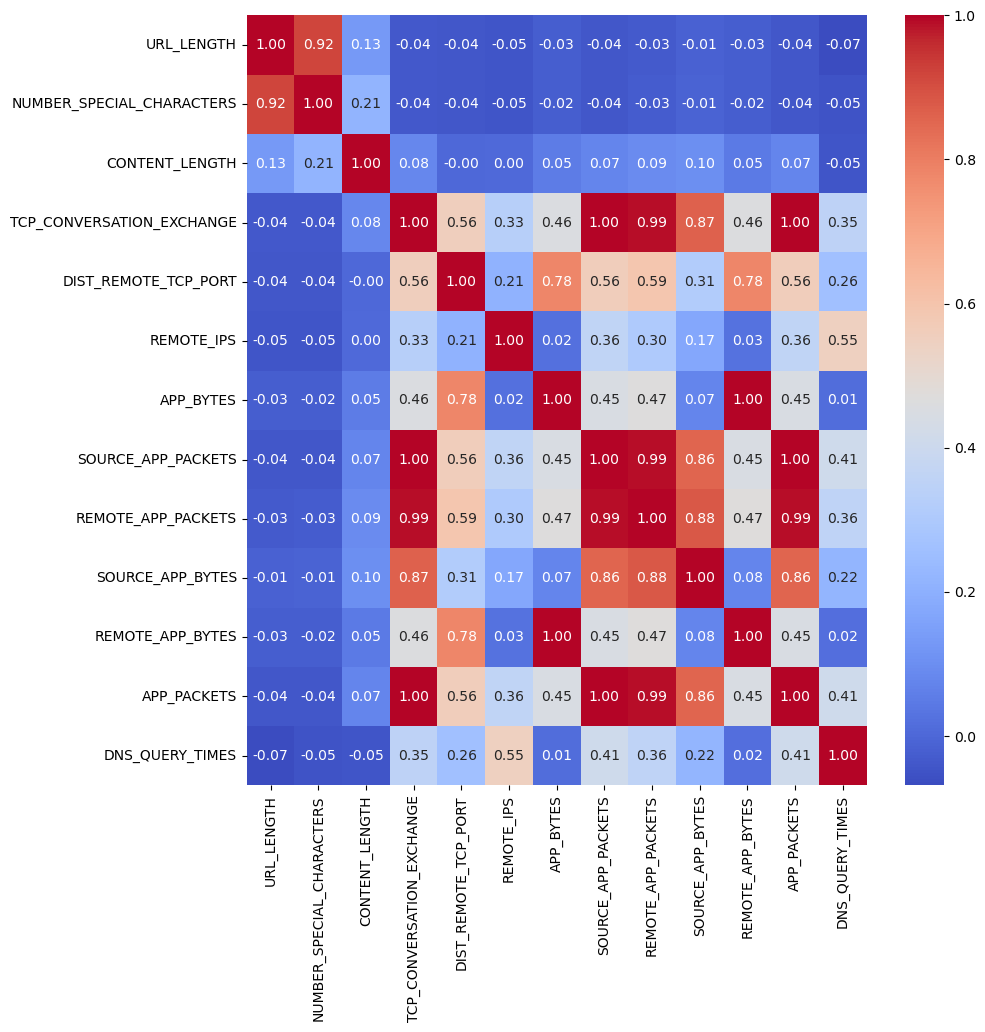

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# numeric columns
numeric_cols = feats.select_dtypes(include=[np.number]).columns.tolist()

# change nans to -1 in content lenght column ''' I saw that more down we work with them, so i commented this  '''
# feats['CONTENT_LENGTH'] = feats['CONTENT_LENGTH'].fillna(-1)

# remove record without dns query times
feats = feats.dropna(subset=['DNS_QUERY_TIMES'])

# correlation matrix
corr_matrix = feats[numeric_cols].corr()

# visualize correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# 

In [10]:
# Find pairs of highly correlated columns
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            high_corr_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

# Print the pairs of columns with high collinearity
for pair in high_corr_pairs:
    print(f"Columns {pair[0]} and {pair[1]} have a correlation of {pair[2]:.2f}")

Columns NUMBER_SPECIAL_CHARACTERS and URL_LENGTH have a correlation of 0.92
Columns SOURCE_APP_PACKETS and TCP_CONVERSATION_EXCHANGE have a correlation of 1.00
Columns REMOTE_APP_PACKETS and TCP_CONVERSATION_EXCHANGE have a correlation of 0.99
Columns REMOTE_APP_PACKETS and SOURCE_APP_PACKETS have a correlation of 0.99
Columns REMOTE_APP_BYTES and APP_BYTES have a correlation of 1.00
Columns APP_PACKETS and TCP_CONVERSATION_EXCHANGE have a correlation of 1.00
Columns APP_PACKETS and SOURCE_APP_PACKETS have a correlation of 1.00
Columns APP_PACKETS and REMOTE_APP_PACKETS have a correlation of 0.99


### This is an example to know the feacture importance using a ML model

> Nothing in this mini-section is working for me, so I will skip it.

In [11]:
# ! pip install xgboost

In [12]:
# X = websites._get_numeric_data().drop('Type', axis=1)
# y = websites.Type

In [13]:
# import xgboost as xgb
# xgb.fit(X,y)

In [14]:
# sort_idx = xgb.feature_importances_.argsort()

In [15]:
# plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
# plt.show();

    In the previous plot we can see the feactures with lower weight in the dataset.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

> In some boxes above I made a list with the highest correlated columns and stored them in `high_corr_pairs`. I will use this list to remove the columns. The list looked as follows:
>
> <div align = "center">
> 
> | Column 1 | Column 2 | Correlation|
> |----------|----------|------------|
> | NUMBER_SPECIAL_CHARACTERS | URL_LENGTH | 0.9180658533774703 |
> | SOURCE_APP_PACKETS | TCP_CONVERSATION_EXCHANGE | 0.9977967442000375 |
> | REMOTE_APP_PACKETS | TCP_CONVERSATION_EXCHANGE | 0.9908480062337905 |
> | REMOTE_APP_PACKETS | SOURCE_APP_PACKETS | 0.9892847140132199 |
> | REMOTE_APP_BYTES | APP_BYTES | 0.9999919795761607 |
> | APP_PACKETS | TCP_CONVERSATION_EXCHANGE | 0.9977967442000375 |
> | APP_PACKETS | SOURCE_APP_PACKETS | 1.0 |
> | APP_PACKETS | REMOTE_APP_PACKETS | 0.9892847140132199 |
>
> </div>
> 
> The first column I will remove is `App_Packets`, as it is the most correlated with other columns.

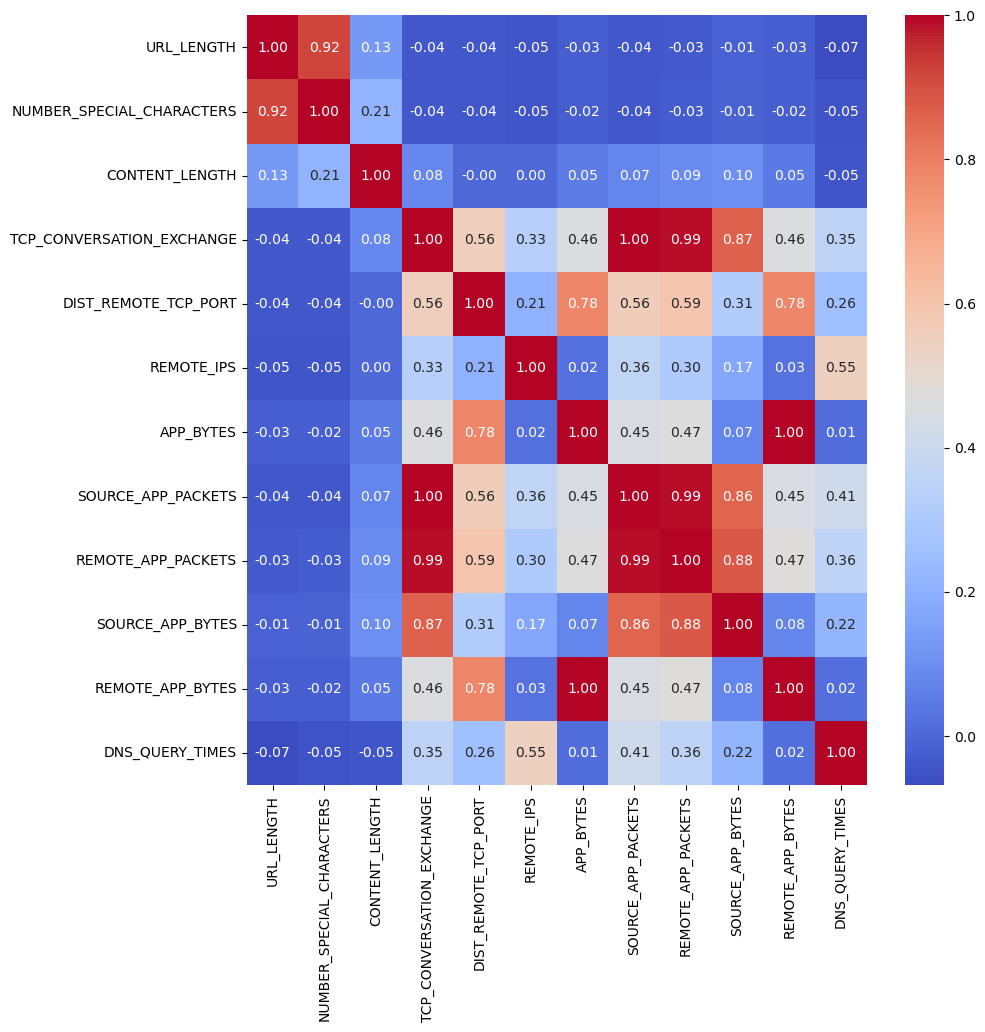

Columns NUMBER_SPECIAL_CHARACTERS and URL_LENGTH have a correlation of 0.92
Columns SOURCE_APP_PACKETS and TCP_CONVERSATION_EXCHANGE have a correlation of 1.00
Columns REMOTE_APP_PACKETS and TCP_CONVERSATION_EXCHANGE have a correlation of 0.99
Columns REMOTE_APP_PACKETS and SOURCE_APP_PACKETS have a correlation of 0.99
Columns REMOTE_APP_BYTES and APP_BYTES have a correlation of 1.00


In [16]:
# Your code here
feats = feats.drop(columns=['APP_PACKETS'])
numeric_cols = feats.select_dtypes(include=[np.number]).columns.tolist()
numeric_df = feats[numeric_cols]

# correlation matrix and graph it
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            high_corr_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

# Print the pairs of columns with high collinearity
for pair in high_corr_pairs:
    print(f"Columns {pair[0]} and {pair[1]} have a correlation of {pair[2]:.2f}")

> After removing `App_Packets`, and plotting the correlation matrix, the highest correlated columns are 
>
> <div align = "center">
    >
    > | Column 1 | Column 2 | Correlation|
    > |----------|----------|------------|
    > | NUMBER_SPECIAL_CHARACTERS | URL_LENGTH | 0.9180658533774703 |
    > | SOURCE_APP_PACKETS | TCP_CONVERSATION_EXCHANGE | 0.9977967442000375 |
    > | REMOTE_APP_PACKETS | TCP_CONVERSATION_EXCHANGE | 0.9908480062337905 |
    > | REMOTE_APP_PACKETS | SOURCE_APP_PACKETS | 0.9892847140132199 |
    > | REMOTE_APP_BYTES | APP_BYTES | 0.9999919795761607 |
    >
> </div>
>
> Next, I will remove `Remote_App_Packets`, as it is the most correlated with other columns.


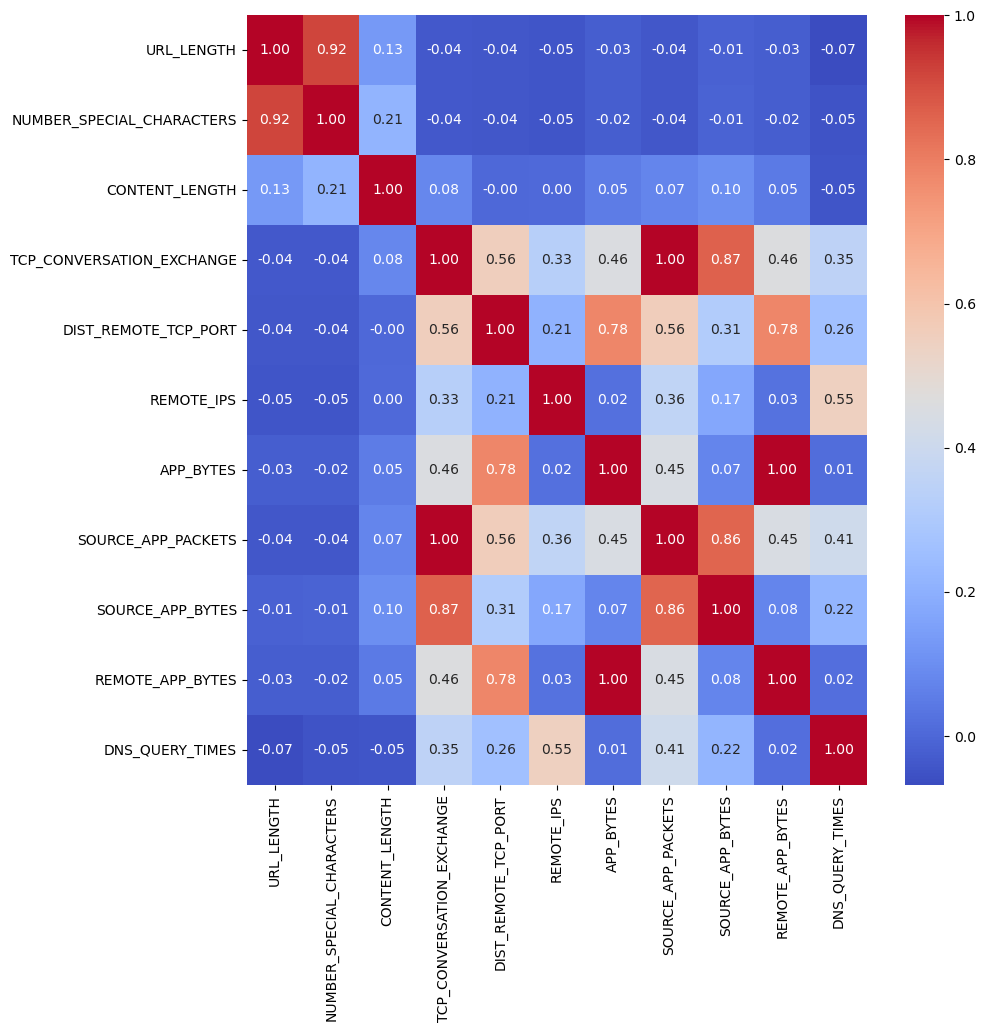

Columns NUMBER_SPECIAL_CHARACTERS and URL_LENGTH have a correlation of 0.92
Columns SOURCE_APP_PACKETS and TCP_CONVERSATION_EXCHANGE have a correlation of 1.00
Columns REMOTE_APP_BYTES and APP_BYTES have a correlation of 1.00


In [17]:
# Drop Rempte app packets column
feats = feats.drop(columns=['REMOTE_APP_PACKETS'])
numeric_cols = feats.select_dtypes(include=[np.number]).columns.tolist()
numeric_df = feats[numeric_cols]

corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            high_corr_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

# Print the pairs of columns with high collinearity
for pair in high_corr_pairs:
    print(f"Columns {pair[0]} and {pair[1]} have a correlation of {pair[2]:.2f}")

> After removing `Remote_App_Packets`, and plotting the correlation matrix, the highest correlated columns are
>
> <div align = "center">
    >
    > | Column 1 | Column 2 | Correlation|
    > |----------|----------|------------|
    > | NUMBER_SPECIAL_CHARACTERS | URL_LENGTH | 0.9180658533774703 |
    > | SOURCE_APP_PACKETS | TCP_CONVERSATION_EXCHANGE | 0.9977967442000375 |
    > | REMOTE_APP_BYTES | APP_BYTES | 0.9999919795761607 |
> </div>
> 
> Next, I will remove `Remote_App_Bytes`, as it is the most correlated with other columns.

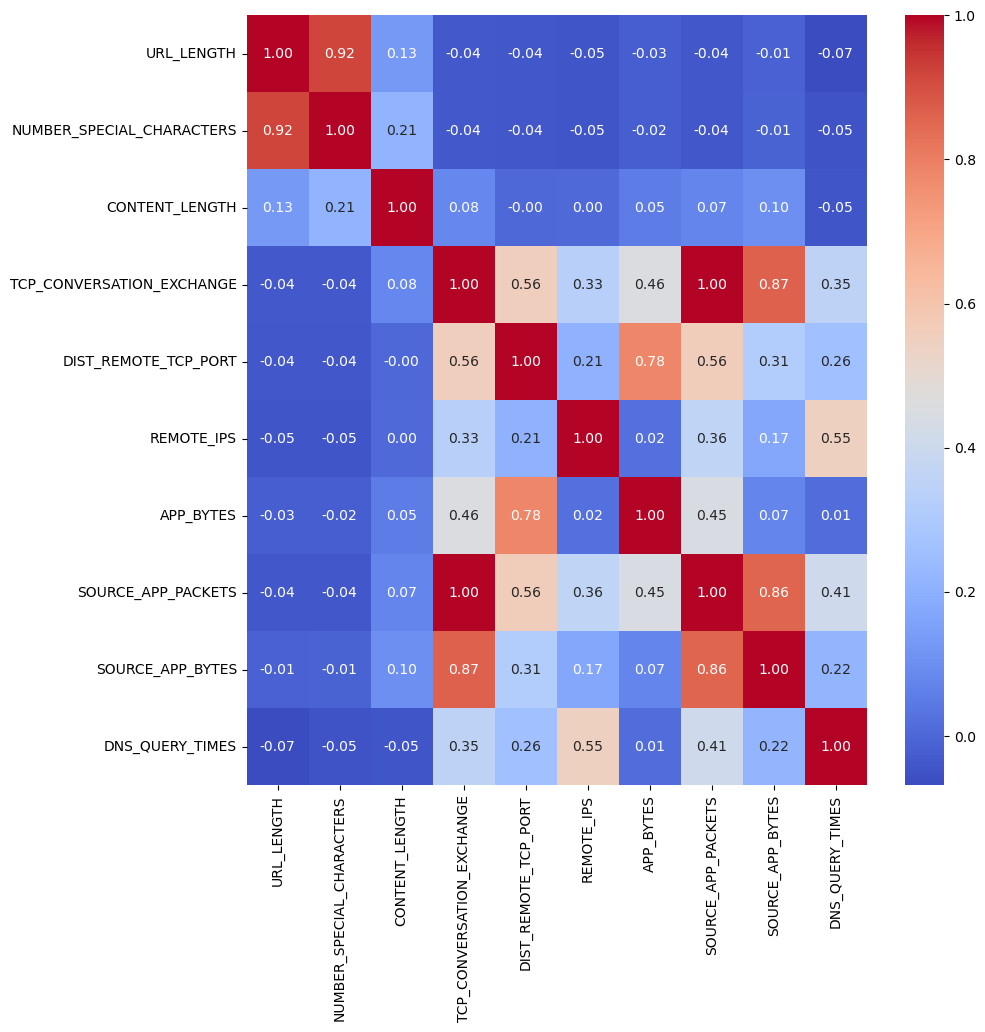

Columns NUMBER_SPECIAL_CHARACTERS and URL_LENGTH have a correlation of 0.92
Columns SOURCE_APP_PACKETS and TCP_CONVERSATION_EXCHANGE have a correlation of 1.00


In [18]:
# Remove Remote app bytes column
feats = feats.drop(columns=['REMOTE_APP_BYTES'])
numeric_cols = feats.select_dtypes(include=[np.number]).columns.tolist()
numeric_df = feats[numeric_cols]

corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            high_corr_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

# Print the pairs of columns with high collinearity
for pair in high_corr_pairs:
    print(f"Columns {pair[0]} and {pair[1]} have a correlation of {pair[2]:.2f}")

> After removing `Remote_App_Bytes`, and plotting the correlation matrix, the highest correlated columns are
>
> <div align = "center">
    >
    > | Column 1 | Column 2 | Correlation|
    > |----------|----------|------------|
    > | NUMBER_SPECIAL_CHARACTERS | URL_LENGTH | 0.9180658533774703 |
    > | SOURCE_APP_PACKETS | TCP_CONVERSATION_EXCHANGE | 0.9977967442000375 |
> </div>
> 
> Next, I will remove `TCP_CONVERSATION_EXCHANGE`, as it is the most correlated with other columns.

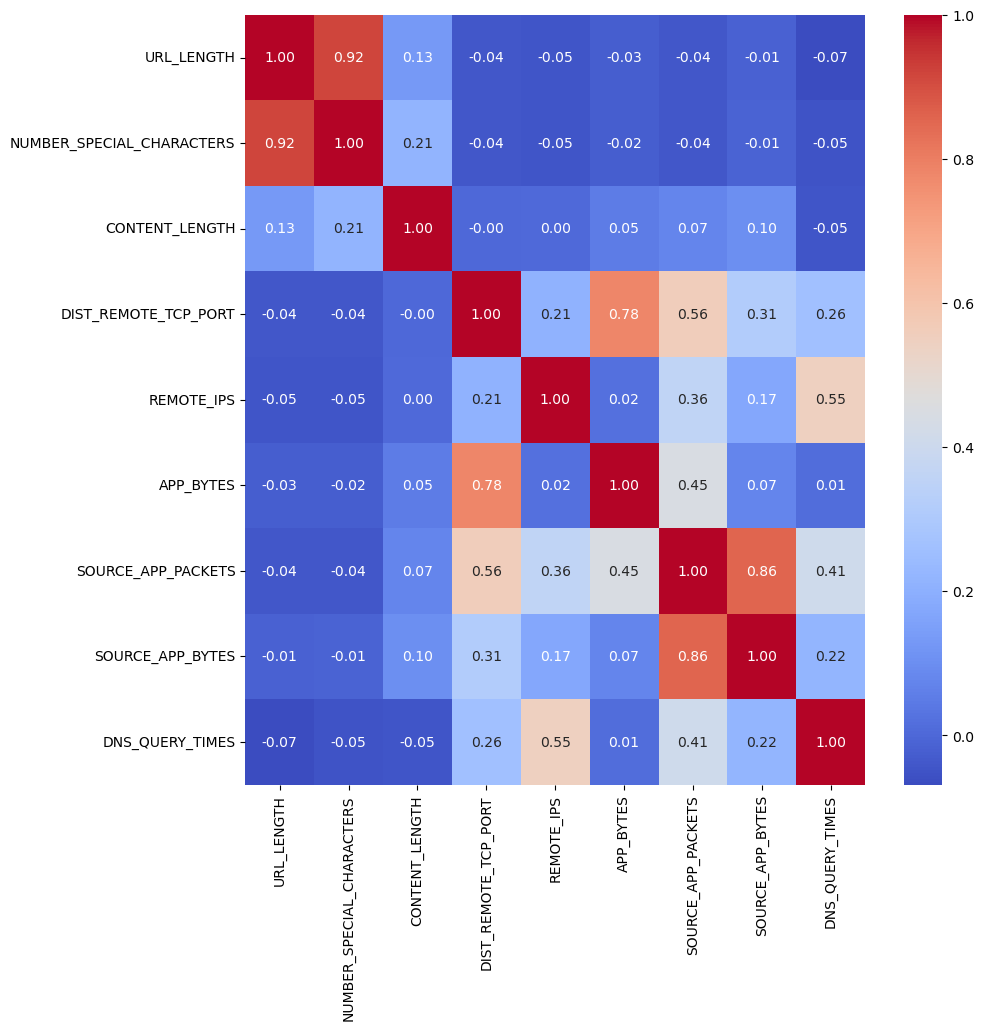

Columns NUMBER_SPECIAL_CHARACTERS and URL_LENGTH have a correlation of 0.92


In [19]:
# Remove TCP_CONVERSATION_EXCHANGE column
feats = feats.drop(columns=['TCP_CONVERSATION_EXCHANGE'])
numeric_cols = feats.select_dtypes(include=[np.number]).columns.tolist()
numeric_df = feats[numeric_cols]

corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            high_corr_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

# Print the pairs of columns with high collinearity
for pair in high_corr_pairs:
    print(f"Columns {pair[0]} and {pair[1]} have a correlation of {pair[2]:.2f}")

> After removing `TCP_CONVERSATION_EXCHANGE`, and plotting the correlation matrix, the highest correlated columns are
>
> <div align = "center">
    >
    > | Column 1 | Column 2 | Correlation|
    > |----------|----------|------------|
    > | NUMBER_SPECIAL_CHARACTERS | URL_LENGTH | 0.9180658533774703 |
> </div>
>
> Next, I will remove `Number_Special_Characters`, as it is the most correlated with other columns.

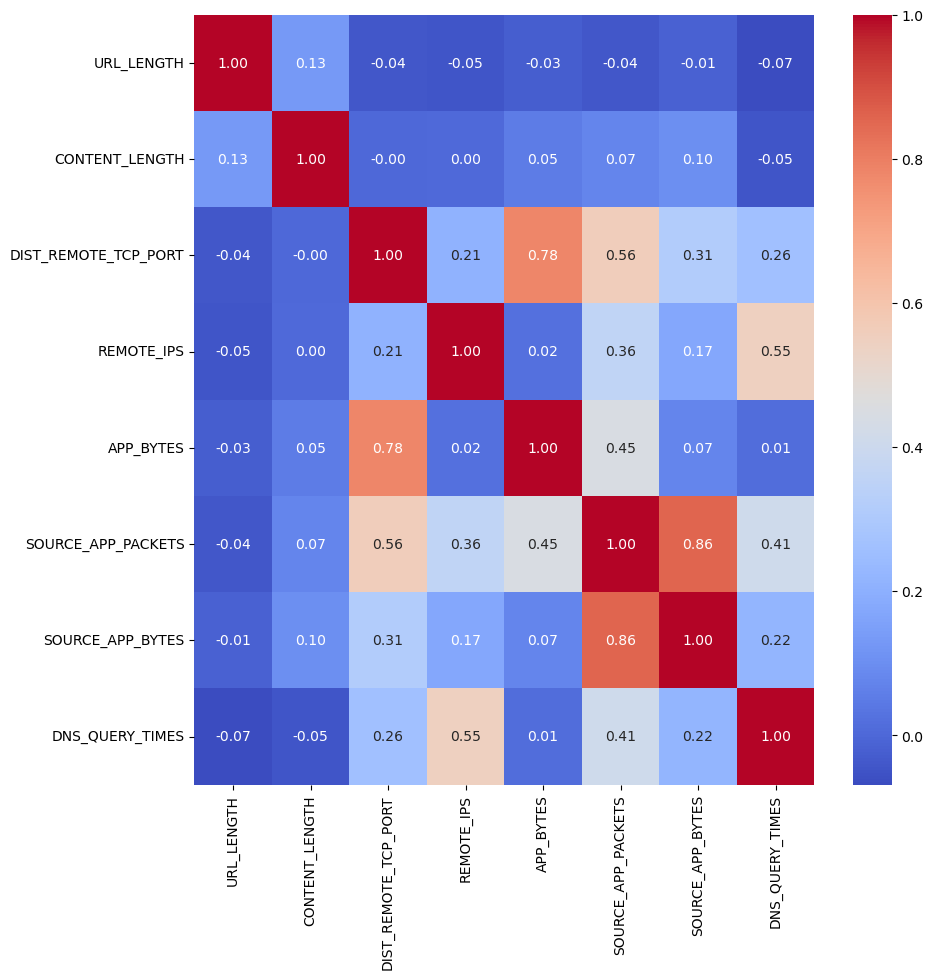

In [20]:
# Remove Number Special Characters column
feats = feats.drop(columns=['NUMBER_SPECIAL_CHARACTERS'])
numeric_cols = feats.select_dtypes(include=[np.number]).columns.tolist()
numeric_df = feats[numeric_cols]

corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            high_corr_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

# Print the pairs of columns with high collinearity
for pair in high_corr_pairs:
    print(f"Columns {pair[0]} and {pair[1]} have a correlation of {pair[2]:.2f}")

> In summary, the removed columns were 
> * `App_Packets`
> * `Remote_App_Packets`
> * `Remote_App_Bytes`
> * `TCP_CONVERSATION_EXCHANGE`
> * `NUMBER_SPECIAL_CHARACTERS`

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [21]:
feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780 entries, 0 to 1780
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   URL                   1780 non-null   object        
 1   URL_LENGTH            1780 non-null   int64         
 2   CHARSET               1773 non-null   object        
 3   SERVER                1604 non-null   object        
 4   CONTENT_LENGTH        968 non-null    float64       
 5   WHOIS_COUNTRY         1474 non-null   object        
 6   WHOIS_STATEPRO        1418 non-null   object        
 7   WHOIS_REGDATE         576 non-null    datetime64[ns]
 8   WHOIS_UPDATED_DATE    659 non-null    datetime64[ns]
 9   DIST_REMOTE_TCP_PORT  1780 non-null   int64         
 10  REMOTE_IPS            1780 non-null   int64         
 11  APP_BYTES             1780 non-null   int64         
 12  SOURCE_APP_PACKETS    1780 non-null   int64         
 13  SOURCE_APP_BYTES      1

In [22]:
# Count missing values per column
missing_values = feats.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
missing_values

WHOIS_REGDATE         1204
WHOIS_UPDATED_DATE    1121
CONTENT_LENGTH         812
WHOIS_STATEPRO         362
WHOIS_COUNTRY          306
SERVER                 176
CHARSET                  7
dtype: int64

In [23]:
# Firts we will drop the columns with more than 50% of missing data
missing_values = missing_values[missing_values > len(feats) * 0.5]
feats = feats.drop(columns=missing_values.index)
display(feats.info())

missing_values = feats.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
missing_values

<class 'pandas.core.frame.DataFrame'>
Index: 1780 entries, 0 to 1780
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1780 non-null   object 
 1   URL_LENGTH            1780 non-null   int64  
 2   CHARSET               1773 non-null   object 
 3   SERVER                1604 non-null   object 
 4   CONTENT_LENGTH        968 non-null    float64
 5   WHOIS_COUNTRY         1474 non-null   object 
 6   WHOIS_STATEPRO        1418 non-null   object 
 7   DIST_REMOTE_TCP_PORT  1780 non-null   int64  
 8   REMOTE_IPS            1780 non-null   int64  
 9   APP_BYTES             1780 non-null   int64  
 10  SOURCE_APP_PACKETS    1780 non-null   int64  
 11  SOURCE_APP_BYTES      1780 non-null   int64  
 12  DNS_QUERY_TIMES       1780 non-null   float64
dtypes: float64(2), int64(6), object(5)
memory usage: 194.7+ KB


None

CONTENT_LENGTH    812
WHOIS_STATEPRO    362
WHOIS_COUNTRY     306
SERVER            176
CHARSET             7
dtype: int64

In [24]:
# Now we will drop the rows with missing data, and their matching labels
feats = feats.dropna()
labels = labels[feats.index]

print(f"Shape of features: {feats.shape}")
print(f"Shape of labels: {labels.shape}")

Shape of features: (639, 13)
Shape of labels: (639,)


#### Again, examine the number of missing values in each column. 

    If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [25]:
# Examine missing values in each column
missing_values = feats.isnull().sum()
print(missing_values, "\n**********************************")

feats.info()
print("***************************")
labels.info()

URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
CONTENT_LENGTH          0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
SOURCE_APP_PACKETS      0
SOURCE_APP_BYTES        0
DNS_QUERY_TIMES         0
dtype: int64 
**********************************
<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 3 to 1780
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   639 non-null    object 
 1   URL_LENGTH            639 non-null    int64  
 2   CHARSET               639 non-null    object 
 3   SERVER                639 non-null    object 
 4   CONTENT_LENGTH        639 non-null    float64
 5   WHOIS_COUNTRY         639 non-null    object 
 6   WHOIS_STATEPRO        639 non-null    object 
 7   DIST_REMOTE_TCP_PORT  639 non-null    int64  
 8

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [26]:
feats.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                512
CA                 41
AU                 11
PA                 10
GB                 10
IN                  6
JP                  6
[u'GB'; u'UK']      5
CH                  5
AT                  4
UA                  2
us                  2
BS                  2
SC                  2
UY                  2
CN                  2
UK                  1
PH                  1
IE                  1
AE                  1
BY                  1
BE                  1
UG                  1
NO                  1
KY                  1
TR                  1
DE                  1
IL                  1
HK                  1
SI                  1
NL                  1
RU                  1
IT                  1
Name: count, dtype: int64

In [27]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

feats.WHOIS_COUNTRY = feats.WHOIS_COUNTRY.apply(lambda x : good_country[x])

In [28]:
feats.WHOIS_COUNTRY.unique()

array(['US', 'RU', 'AU', 'CA', 'PA', 'IN', 'UK', 'UG', 'JP', 'SI', 'AT',
       'CN', 'KY', 'TR', 'SC', 'NL', 'UA', 'CH', 'HK', 'IL', 'DE', 'IT',
       'BS', 'NO', 'BE', 'BY', 'AE', 'IE', 'PH', 'UY'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [29]:
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

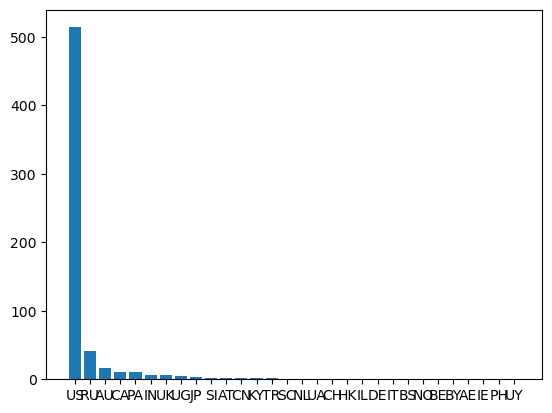

<Figure size 1500x1500 with 0 Axes>

In [30]:
print_bar_plot(feats.WHOIS_COUNTRY.unique(),feats.WHOIS_COUNTRY.value_counts());

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [31]:
# Keep top ten values and set the rest to 'Other'
top_ten = feats.WHOIS_COUNTRY.value_counts().head(10).index
feats.WHOIS_COUNTRY = feats.WHOIS_COUNTRY.apply(lambda x: x if x in top_ten else 'Other')
feats.WHOIS_COUNTRY.value_counts().head(14)

WHOIS_COUNTRY
US       514
CA        41
Other     24
UK        16
AU        11
PA        10
IN         6
JP         6
CH         5
AT         4
SC         2
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [32]:
# drop WHOIS_STATEPRO. The other two columns (WHOIS_REGDATE, WHOIS_UPDATED_DATE) were already dropped
feats = feats.drop(columns=['WHOIS_STATEPRO'])
feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 3 to 1780
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   639 non-null    object 
 1   URL_LENGTH            639 non-null    int64  
 2   CHARSET               639 non-null    object 
 3   SERVER                639 non-null    object 
 4   CONTENT_LENGTH        639 non-null    float64
 5   WHOIS_COUNTRY         639 non-null    object 
 6   DIST_REMOTE_TCP_PORT  639 non-null    int64  
 7   REMOTE_IPS            639 non-null    int64  
 8   APP_BYTES             639 non-null    int64  
 9   SOURCE_APP_PACKETS    639 non-null    int64  
 10  SOURCE_APP_BYTES      639 non-null    int64  
 11  DNS_QUERY_TIMES       639 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 64.9+ KB


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [33]:
# Your code here
feats.select_dtypes(exclude=[np.number]).columns

Index(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY'], dtype='object')

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [34]:
# Your code here
feats = feats.drop(columns=['URL'])
feats.select_dtypes(exclude=[np.number]).columns

Index(['CHARSET', 'SERVER', 'WHOIS_COUNTRY'], dtype='object')

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [35]:
# Your code here
feats['CHARSET'].value_counts()

CHARSET
UTF-8           201
ISO-8859-1      169
utf-8           109
us-ascii         92
iso-8859-1       67
windows-1251      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [36]:
# Your code here
print(feats['SERVER'].nunique())
feats['SERVER'].value_counts()

120


SERVER
Apache                    163
Microsoft-HTTPAPI/2.0      76
nginx                      59
GSE                        46
Microsoft-IIS/7.5          40
                         ... 
barista/5.1.3               1
mw2225.codfw.wmnet          1
openresty/1.11.2.2          1
Apache/2.2.23 (Amazon)      1
Apache/2.2.16 (Debian)      1
Name: count, Length: 120, dtype: int64

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [37]:
# Count `SERVER` value counts here
print(feats['SERVER'].nunique())
print(feats['SERVER'].count())
print()
print(feats['SERVER'].value_counts())

# Change servers to microsoft, apache, nginx, and others. if the string contains one of those, change them to the name
feats['SERVER'] = feats['SERVER'].apply(lambda x: 'Microsoft' if 'Microsoft' in x else ('Apache' if 'Apache' in x else ('nginx' if 'nginx' in x else 'Other')))

print("\n\n*************** SERVER re-labeled ***************")
display(feats['SERVER'].nunique())
display(feats['SERVER'].value_counts())
feats['SERVER'].count()

120
639

SERVER
Apache                    163
Microsoft-HTTPAPI/2.0      76
nginx                      59
GSE                        46
Microsoft-IIS/7.5          40
                         ... 
barista/5.1.3               1
mw2225.codfw.wmnet          1
openresty/1.11.2.2          1
Apache/2.2.23 (Amazon)      1
Apache/2.2.16 (Debian)      1
Name: count, Length: 120, dtype: int64


*************** SERVER re-labeled ***************


4

SERVER
Apache       300
Microsoft    128
Other        109
nginx        102
Name: count, dtype: int64

639

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [38]:
# Your code here
cat_cols =  feats.select_dtypes(exclude=[np.number]).columns.tolist()
print(cat_cols)

website_dummy = pd.get_dummies(feats, columns=cat_cols, drop_first=True)


['CHARSET', 'SERVER', 'WHOIS_COUNTRY']


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [39]:
# Your code here
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 3 to 1780
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL_LENGTH            639 non-null    int64  
 1   CONTENT_LENGTH        639 non-null    float64
 2   DIST_REMOTE_TCP_PORT  639 non-null    int64  
 3   REMOTE_IPS            639 non-null    int64  
 4   APP_BYTES             639 non-null    int64  
 5   SOURCE_APP_PACKETS    639 non-null    int64  
 6   SOURCE_APP_BYTES      639 non-null    int64  
 7   DNS_QUERY_TIMES       639 non-null    float64
 8   CHARSET_UTF-8         639 non-null    bool   
 9   CHARSET_iso-8859-1    639 non-null    bool   
 10  CHARSET_us-ascii      639 non-null    bool   
 11  CHARSET_utf-8         639 non-null    bool   
 12  CHARSET_windows-1251  639 non-null    bool   
 13  SERVER_Microsoft      639 non-null    bool   
 14  SERVER_Other          639 non-null    bool   
 15  SERVER_nginx          639 n

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [59]:
from sklearn.model_selection import train_test_split
import random
from os import urandom

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(website_dummy, labels, test_size=0.2, random_state=random.seed(urandom(2)), shuffle=True)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [60]:
# Your code here:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='saga', max_iter=5000) 

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [61]:
# Your code here:
logistic_model.fit(X_train, y_train)

c:\Users\Natanael\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=5000, solver='saga')

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

Accuracy: 0.96875
[[124   0]
 [  4   0]]


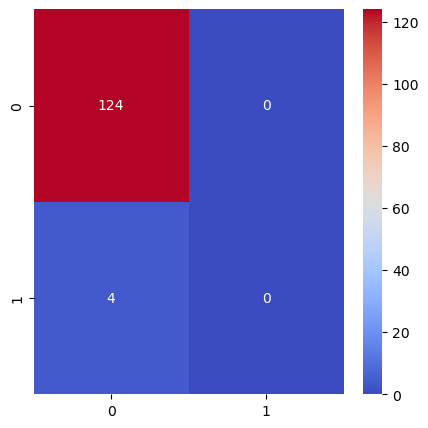

In [62]:
# Your code here:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = logistic_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap='coolwarm')
plt.show()

In [63]:
y_test.value_counts()

Type
0    124
1      4
Name: count, dtype: int64

What are your thoughts on the performance of the model? Write your conclusions below.

> The model is working fine, with an accuracy of > 90% but it have many errors. It predicts malicious websites as non-malicious. In fact, after itirating several times, the model did not catalogue any website as malicious.

#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [64]:
# Use desicion tree classifier with max_depth = 3
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

confusion matrix (predict)
 [[117   7]
 [  1   3]]
real values
 Type
0    124
1      4
Name: count, dtype: int64

confusion matrix (predict_proba)
 [[117   7]
 [  1   3]]
real values
 Type
0    124
1      4
Name: count, dtype: int64
Accuracy desicion tree: 0.9375
Accuracy desicion tree (using predit_proba): 0.9375


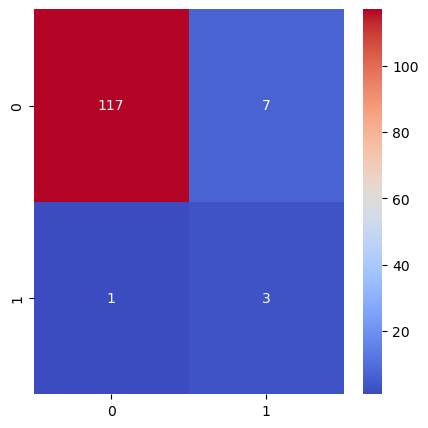

In [68]:
# compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)
y_pred_dt = dt_model.predict(X_test)
y_predict_proba_dt = dt_model.predict_proba(X_test)

# change probs to 0 or 1, using 0.5 as a threshold (if 0.5 or more, then 1)
y_predict_proba_dt = np.where(y_predict_proba_dt[:,1] >= 0.5, 1, 0)

# Confussion matrix for y_pred_dt and y_predict_proba_dt2
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("confusion matrix (predict)\n",conf_matrix_dt)
print("real values\n",y_test.value_counts())

conf_matrix_dt2 = confusion_matrix(y_test, y_predict_proba_dt)
print("\nconfusion matrix (predict_proba)\n",conf_matrix_dt2)
print("real values\n",y_test.value_counts())

# Accuracy for y_pred_dt and y_predict_proba_dt2
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy desicion tree: {accuracy_dt}")

accuracy_dt_proba = accuracy_score(y_test, y_predict_proba_dt)
print(f"Accuracy desicion tree (using predit_proba): {accuracy_dt_proba}")

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt=".0f", cmap='coolwarm')
plt.show()

#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

confusion matrix (predict)
 [[119   5]
 [  0   4]]

confusion matrix (predict_proba)
 [[119   5]
 [  0   4]]

real values
 Type
0    124
1      4
Name: count, dtype: int64

Accuracy desicion tree: 0.9609375
Accuracy desicion tree (using predit_proba): 0.9609375


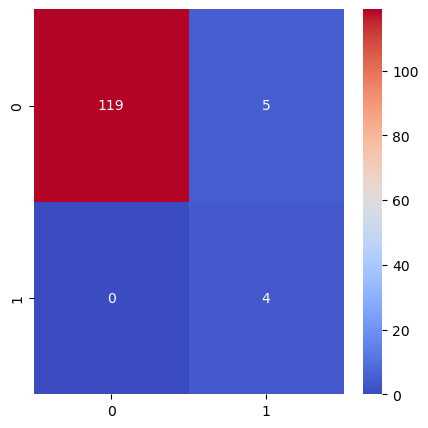

In [73]:
# Initialize desicion tree classifier with max_depth = 5
dt_model2 = DecisionTreeClassifier(max_depth=5)
dt_model2.fit(X_train, y_train)

# compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)
y_pred_dt2 = dt_model2.predict(X_test)
y_predict_proba_dt2 = dt_model2.predict_proba(X_test)
y_predict_proba_dt2 = np.where(y_predict_proba_dt2[:,1] >= 0.5, 1, 0)

# Confussion matrix for y_pred_dt2 and y_predict_proba_dt2
conf_matrix_dt2 = confusion_matrix(y_test, y_pred_dt2)
print("confusion matrix (predict)\n",conf_matrix_dt2)

conf_matrix_dt2 = confusion_matrix(y_test, y_predict_proba_dt2)
print("\nconfusion matrix (predict_proba)\n",conf_matrix_dt2)

print("\nreal values\n",y_test.value_counts())

# Accuracy for y_pred_dt2 and y_predict_proba_dt2
accuracy_dt2 = accuracy_score(y_test, y_pred_dt2)
print(f"\nAccuracy desicion tree: {accuracy_dt2}")

accuracy_dt_proba2 = accuracy_score(y_test, y_predict_proba_dt2)
print(f"Accuracy desicion tree (using predit_proba): {accuracy_dt_proba2}")

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_dt2, annot=True, fmt=".0f", cmap='coolwarm')
plt.show()


Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

> The desicion tree with a max depth of 5 demonstrated a great improvement when compared to the one with max depth of 3. Although the accuracy percentages were very similar (**94%** for `max_depth=3` and **96%** for `max_depth=5`), the type II error were completely reduced (although type I increased). Even with this error shift, I consider it to be a better model, since it correctly labels malicious websites as such, with the downside of marking some good websites as malicious. 

<!-- Add your conclusion here -->

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here

## Comments:

Add your comments here: